In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#import wordcloud
from wordcloud.wordcloud import WordCloud
from collections import Counter

In [3]:
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings(action='once')


In [35]:
lyrics = pd.read_csv('/Users/rong/Documents/Columbia_python_jupyter_notebook/fall2019-proj1--Sixuan-Li/output/dt_lyrics.csv')
artists = pd.read_csv('/Users/rong/Documents/Columbia_python_jupyter_notebook/fall2019-proj1--Sixuan-Li/data/artists.csv')

In [38]:
lyrics.head()

Unnamed: 0                   song  year artist    genre  \
0           1  when-you-were-with-me  2009      a  Hip-Hop   
1           2       careless-whisper  2009      a  Hip-Hop   
2           3                   2-59  2007      a  Hip-Hop   
3           4        power-of-desire  2007      a  Hip-Hop   
4           5     you-re-not-in-love  2007      a  Hip-Hop   

                                              lyrics  id  \
0  I stopped by the house we called our home\nIt ...   1   
1  I feel so unsure\nAs I take your hand and lead...   2   
2  Mark:] Sunday football I got boot off the pitc...   3   
3  [Chris:] Fallin' for a fantasy\nI threw away m...   4   
4  something in the way we touch\nyou hold my han...   5   

                                        stemmedwords  
0  stop house call home rundown grass overgrown s...  
1  unsure hand lead dance floor music die eyes ca...  
2  mark sunday football boots pitch people gamble...  
3  chris fallin fantasy threw destiny stop feelin...  
4  touch hold hand hold somethings change somethi...

In [39]:
artists_filter = artists.dropna()

In [42]:
result = pd.concat([lyrics, artists_filter], axis=1, join='inner',keys = ['artist','Artist'])

In [43]:
result

artist                                                           \
     Unnamed: 0                                               song  year   
7             8                                           stranger  2013   
9            10                                        die-tonight  2005   
17           18                                         2nd-coming  2005   
22           23                                       took-it-away  2002   
26           27                                      shut-yer-face  2002   
28           29                                        w-d-y-c-a-i  2002   
29           30                                         going-down  2002   
61           62                                      t-shirt-money  2008   
63           64                                        french-kiss  2008   
74           75                                     frequent-flyer  2007   
76           77                                such-a-bad-comedown  2007   
78           79                                    walking-the-cow  2007   
92           93                                                red  2007   
108         109                                       pearl-summer  2007   
142         143                            if-it-means-alot-to-you  2009   
148         149                                          heartless  2007   
150         151                                 start-the-shooting  2007   
155         156                                if-looks-could-kill  2007   
159         160             your-way-with-words-is-through-silence  2007   
165         166                                        dead-buried  2013   
173         174                                   i-m-already-gone  2013   
174         175                                           violence  2013   
175         176  sometimes-you-re-the-hammer-sometimes-you-re-t...  2013   
195         196                                 forgive-and-forget  2016   
201         202                                     same-about-you  2016   
208         209                          casablanca-sucked-anyways  2015   
228         229                                      coming-around  2009   
297         298                                        suicide-day  2006   
310         311                                    out-in-the-dark  2007   
322         323                                          mind-bomb  2007   
...         ...                                                ...   ...   
2345       2346                dee-wee-my-friend-the-massive-idiot  2006   
2357       2358                                                ten  2016   
2366       2367                                 don-t-you-remember  2011   
2371       2372                                   rolling-the-deep  2011   
2377       2378                                             fiasco  2011   
2391       2392                                       send-my-love  2015   
2416       2417                                never-tear-us-apart  2014   
2422       2423                                 dirty-little-thing  2009   
2442       2443                                        good-enough  2011   
2448       2449                                     cage-the-beast  2011   
2458       2459                                     dog-on-a-leash  2014   
2463       2464                                     something-more  2014   
2469       2470                                         life-sucks  2009   
2477       2478                                         the-losers  2007   
2493       2494                    better-living-through-chemistry  2005   
2494       2495                                         vikraphone  2005   
2514       2515                                           immortal  2002   
2535       2536                                       sexual-needs  2007   
2584       2585                                        allen-hotel  2007   
2627       2628                                    the-id

In [11]:
keep_coulms_label = [ 'song', 'year', 'artist', 'genre', 'id', 'stemmedwords']

In [7]:
lyrics.head()

Unnamed: 0                   song  year artist    genre  \
0           1  when-you-were-with-me  2009      a  Hip-Hop   
1           2       careless-whisper  2009      a  Hip-Hop   
2           3                   2-59  2007      a  Hip-Hop   
3           4        power-of-desire  2007      a  Hip-Hop   
4           5     you-re-not-in-love  2007      a  Hip-Hop   

                                              lyrics  id  \
0  I stopped by the house we called our home\nIt ...   1   
1  I feel so unsure\nAs I take your hand and lead...   2   
2  Mark:] Sunday football I got boot off the pitc...   3   
3  [Chris:] Fallin' for a fantasy\nI threw away m...   4   
4  something in the way we touch\nyou hold my han...   5   

                                        stemmedwords  
0  stop house call home rundown grass overgrown s...  
1  unsure hand lead dance floor music die eyes ca...  
2  mark sunday football boots pitch people gamble...  
3  chris fallin fantasy threw destiny stop feelin...  
4  touch hold hand hold somethings change somethi...

In [10]:
genre_list = list(set(lyrics['genre']))
genre_list

['Jazz',
 'Pop',
 'Indie',
 'Country',
 'Hip-Hop',
 'Rock',
 'R&B',
 'Electronic',
 'Not Available',
 'Metal',
 'Other',
 'Folk']

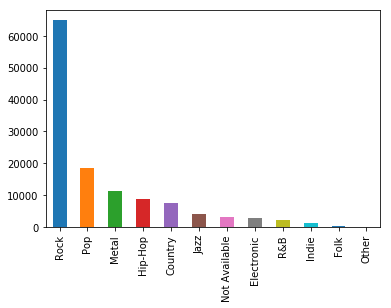

In [8]:
lyrics['genre'].value_counts().plot.bar()

In [22]:
def df_genre(genre):
    """sub original lyrics dataframe by genre
    Input
    ------
        genre: different genre, a list, no duplicate variable
    Return
    ------
        dataframe that only contain rows that belong to input genre"""
    dataframe_all =  lyrics[lyrics['genre']==genre]
    return dataframe_all[keep_coulms_label]
    
def series_stemmedwords (dataframe_genre):
    """return a pandas series that only contain stemmedwords"""
    return dataframe_genre['stemmedwords']

def df_add_words(dataframe_genre):
    #https://sigdelta.com/blog/text-analysis-in-pandas/
    dataframe_genre_add = dataframe_genre.copy()
    dataframe_genre_add['words'] = dataframe_genre_add.stemmedwords.str.strip().str.split('[\W_]+')
    return dataframe_genre_add

def list_all_words(dataframe_add):
    """get a list contain all words in stemmwords
    Input
    -----
        dataframe_add : a dataframe, should be the one add words col
    Return
    ----
        a list contain every words from words col"""

    combine_list_words = list()
    for l in dataframe_add['words']:
        combine_list_words.append(l)
    combine_list_words = [val for sublist in combine_list_words for val in sublist] 
    return combine_list_words

def float_words_using(dataframe_add):
    return len(set(list_all_words(dataframe_add)))/len(list_all_words(dataframe_add))

def df_counts_words(list_words,int_common):
    """get a df with only words and counts
    Input
    ----
        list_words: a list of words that want to count,should be the output of list_all_words
        int_common: a int, the first how many words with highest freq want to show
    Return
    ------
        a dataframe that only contain words and counts, from max to min order"""
    counts = Counter(list_words)
    df_counts = pd.DataFrame(
    {'words': 
list(counts.keys()),
     'counts': 
list(counts.values())
    })
    df_counts = df_counts.sort_values('counts',ascending=False)
    if int_common is not None:
        return df_counts.iloc[0:int_common]
    return df_counts

def word_cloud_plot(list_words,int_common=None):
    #https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
    d = {}
    for a, x in df_counts_words(list_words,int_common).values:
        d[a] = x
    #convert list to string and generate
    unique_string=(" ").join(list_words)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

def word_cloud_via_genre(genre,int_common=None):
    """main function for word cloud via genre
    Inputs
    ----
        genre: string
        int_common: integer,choose how many rows form df, the highest freq of words
    Return
    ----
        a plot of wordcloud"""
    dataframe_genre = df_genre(genre)
    dataframe_add = df_add_words(dataframe_genre)
    list_words = list_all_words(dataframe_add)
    
    return word_cloud_plot(list_words,int_common)



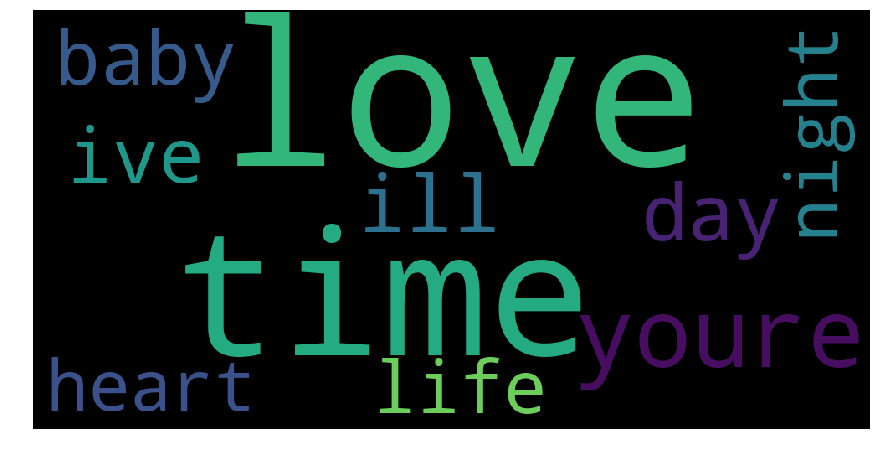

In [19]:
word_cloud_via_genre('Rock',int_common=10)

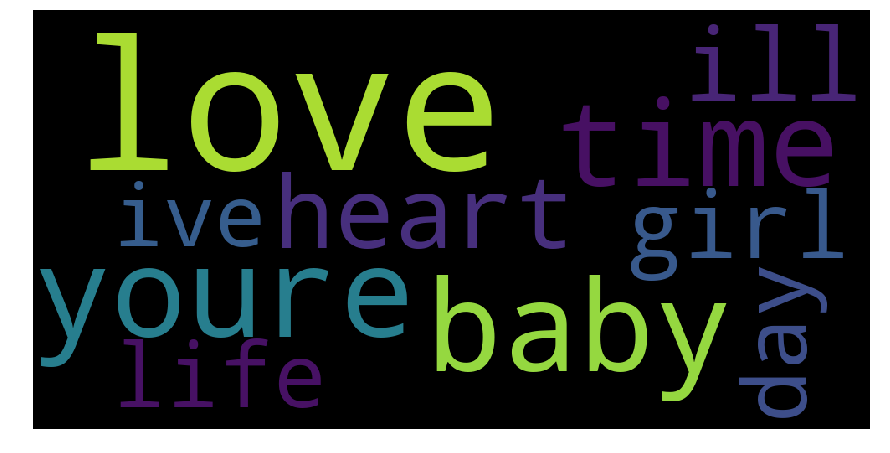

In [20]:
word_cloud_via_genre('Pop',int_common=10)

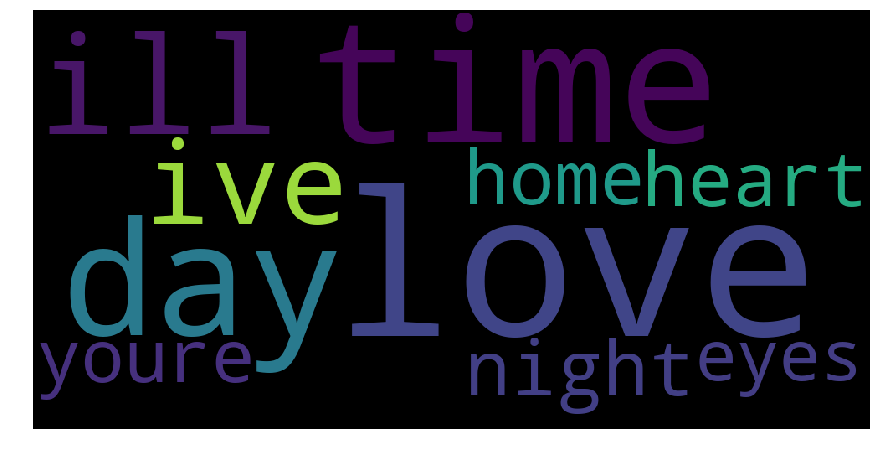

In [21]:
word_cloud_via_genre('Folk',int_common=10)

In [24]:
df_add_pop = df_add_words(df_genre('Pop'))
l_pop = list_all_words(df_add_pop)